<a href="https://colab.research.google.com/github/SampMark/Machine-Learn/blob/main/Agglomerative_Hierarchical_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Agrupamento Hierárquico Aglomerativo** (_Agglomerative Hierarchical Clustering_)


O Agrupamento Hierárquico (_Hierarchical Clustering_) é um método de aprendizado de máquina não supervisionado que organiza os dados em uma hierarquia de clusters, representada visualmente por meio de um dendrograma. Essa abordagem é particularmente útil para analisar dados e identificar padrões, sem a necessidade de especificar previamente o número de clusters desejados.

Existem dois tipos principais de Agrupamento Hierárquico:

* **Divisivo** (_top-down_): Este método inicia com todos os pontos de dados agrupados em um único cluster e, de forma progressiva, o divide em clusters menores. O processo continua até que cada ponto de dado seja tratado como um cluster individual.

* **Aglomerativo** (_bottom-up_): neste caso, cada ponto de dado começa como um cluster individual. Os clusters são então mesclados iterativamente, formando grupos progressivamente maiores, até que todos os pontos pertençam a um único cluster.

## **Etapas do Algoritmo Aglomerativo**

1. **Inicialização**: cada ponto de dado é tratado como um cluster individual.

2. **Cálculo da Matriz de Distâncias/Proximidade**: uma matriz é criada para armazenar as distâncias entre todos os pares de clusters.

3. **Combinação de Clusters**: ocorre a mesclagem dos dois clusters mais próximos, com base na matriz de proximidade, que são combinados em um novo cluster.

4. **Atualização da Matriz de Distâncias**: a matriz de distâncias/proximidade é recalculada para refletir as distâncias entre o novo cluster formado e os clusters restantes.

5. **Repetição**: as etapas de mesclagem e atualização são repetidas iterativamente até que o número desejado de clusters seja alcançado ou até que todos os pontos estejam agrupados em um único cluster.

Essa sequência de etapas constrói uma hierarquia de agrupamentos, que pode ser visualizada em um dendrograma, permitindo explorar a estrutura dos dados em diferentes níveis.

## **Aplicações e Considerações**

O Agrupamento Hierárquico Aglomerativo é amplamente utilizado em diversas áreas, incluindo:
* **Biologia**: análise de genes e classificar espécies com características similares.
* **Marketing**: para segmentar clientes e personalizar campanhas de marketing.
* **Redução de Dimensionalidade**: identificação de padrões em grandes conjuntos de dados, por exmplo, para análise de imagens e reconhecimento de padrões.

Uma vantagem significativa deste método é não ser necessário especificar previamente o número de clusters; a hierarquia completa permite ao analista escolher o nível de granularidade apropriado.

Entretanto, pode ser computacionalmente intensivo para conjuntos de dados muito grandes, com complexidade de tempo geralmente em torno de O(n³) e requisitos de memória de Ω(n²).

## **Instalando e importando as bibliotecas necessárias**

---



In [ ]:
!pip install matplotlib pandas numpy scipy scikit-learn

In [ ]:
import numpy as np
import pandas as pd
from scipy.cluster import hierarchy
from scipy.spatial import distance_matrix
from matplotlib import pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score

## **Gerando um DataSet aleatório com a Classe `make_blobs`**

---
Configuração inicial dos parâmetros em make_blobs:

* `n_samples`: número total de pontos divididos igualmente entre os clusters (número entre 10 a 1500).

* `centers`: locais fixos dos centros (ex. `centers = [[1,1], [2,5]]`) na  matriz de coordenadas (x, y) para gerar os centros ou número de centros a serem gerados (opção de 1 a 10 centros).

* `cluster_std`: desvio padrão dos clusters, quanto maior o número, mais distantes os clusters (um número entre 0,5 e 1,5).

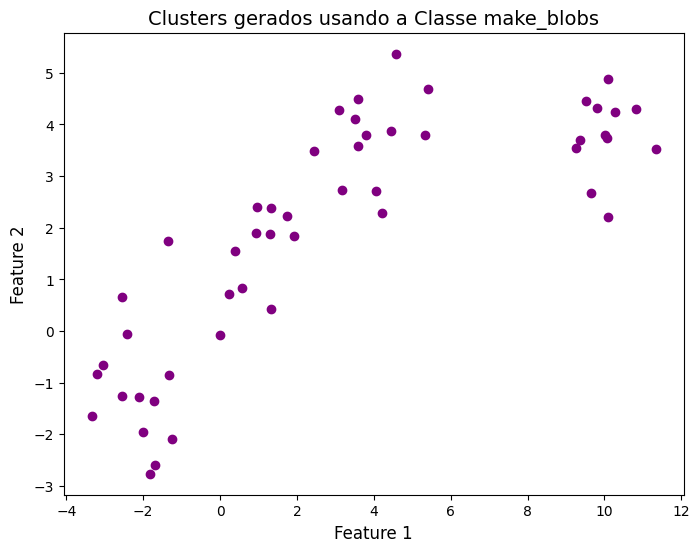

In [44]:
# Configurações iniciais para make_blobs
n_samples = 50
centers = [[4, 4], [-2, -1], [1, 1], [10, 4]]
cluster_std = 0.9

# Gerando os dados
X1, y1 = make_blobs(n_samples=n_samples, centers=centers, cluster_std=cluster_std, random_state=42)

# Visualização dos dados aleatórios
plt.figure(figsize=(8, 6))
plt.scatter(X1[:, 0], X1[:, 1], c='purple') # cmap='viridis', marker='o', edgecolor='k'
plt.title('Clusters gerados usando a Classe make_blobs', fontsize=14)
plt.xlabel('Feature 1', fontsize=12)
plt.ylabel('Feature 2', fontsize=12)
# plt.grid(True, linestyle='--', alpha=0.7)
# plt.colorbar(label='Clusters reais')
plt.show()

## **Modelando o Agrupamento Hierárquico Aglomerativo**

---


Vamos iniciar o processo de agrupamento com os pontos de dados aleatórios sugeridos acima, utilizando a classe `AgglomerativeClustering`, que tem como parâmetros:

* `n_clusters`: define o número de clusters que desejamos formar e, consequentemente, o número de centroides a serem gerados.

* `linkage`: determina o critério de ligação que será usado, o qual define a medida de distância utilizada entre os conjuntos de observações. O algoritmo irá mesclar os pares de clusters que minimizam essa distância.

Antes, é necessário esclarecer melhor sobre os critérios de ligação existentes no Scikit-Learn, disponíveis para o critério `linkage`.

### **Escolha dos Critério de Ligação**

Os métodos de ligação definem como calcular a distância entre dois clusters durante o processo de agrupamento. Cada método possui características específicas que influenciam a forma como os clusters são combinados.

* **Ligação Única** (`linkage='single'`): a distância entre dois clusters é definida como a menor distância entre quaisquer dois pontos nos clusters.
  * Tende a formar clusters em cadeias, conectando pontos próximos sequencialmente.
  É mais sensível a ruídos e outliers.

* **Ligação Completa** (`linkage='complete'`): a distância entre dois clusters é definida como a maior distância entre quaisquer dois pontos nos clusters.
  * Gera clusters mais compactos e esféricos, porém é menos sensível a _outliers_ em comparação à ligação única.

* **Ligação Média** (`linkage='average'`): a distância entre dois clusters é definida como a distância média entre todos os pares de pontos nos clusters.
  * Considera a distribuição geral dos pontos no cluster, sendo um bom equilíbrio entre os métodos de ligação única e completa.

* **Ligação Centróide** (`linkage='ward'`): a distância entre dois clusters é a distância entre os centróides (médias dos pontos) de cada cluster. Esse método minimiza a soma dos quadrados das diferenças internas ao cluster.
  * É mais eficiente computacionalmente, mas pode gerar resultados inconsistentes, como inversão de hierarquia.

In [ ]:
# Configuração do agrupamento hierárquico
n_clusters = 4  # Número de clusters desejados
linkage_method = 'average'  # Método de ligação entre clusters

# Criação do modelo
agglom = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage_method)

# Ajustando o modelo
agglom.fit(X1)

AgglomerativeClustering(linkage='average', n_clusters=4)

In [ ]:
# Obtenção dos rótulos dos clusters
cluster_labels = agglom.labels_
print(f"Rótulos dos clusters: {cluster_labels}")

Rótulos dos clusters: [2 1 2 1 1 3 1 3 3 3 2 3 3 2 2 0 2 0 0 0 1 1 1 3 2 0 2 0 1 1 2 2 0 0 0 2 1
 1 3 1 3 3 0 2 2 3 3 0 0 1]


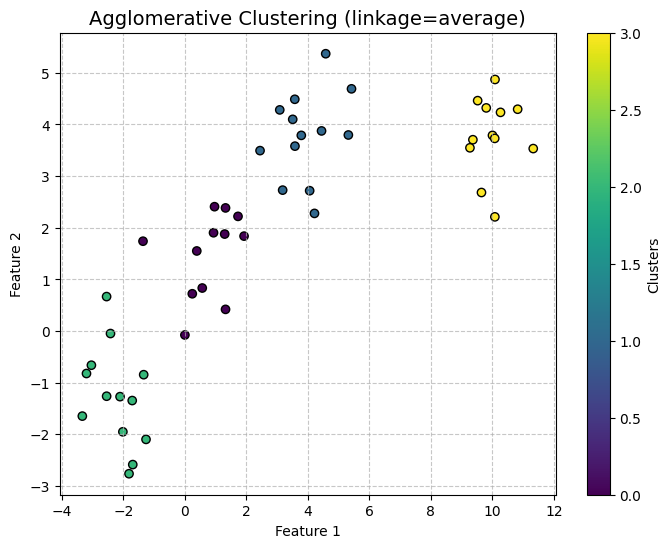

Coeficiente de silhueta: 0.64


In [ ]:
# Visualizando os clusters gerados
plt.figure(figsize=(8, 6))
plt.scatter(X1[:, 0], X1[:, 1], c=cluster_labels, cmap='viridis', marker='o', edgecolor='k')
plt.title(f'Agglomerative Clustering (linkage={linkage_method})', fontsize=14)
plt.xlabel('Feature 1', fontsize=10)
plt.ylabel('Feature 2', fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)
plt.colorbar(label='Clusters')
plt.show()

# Avaliação com coeficiente de silhueta
silhouette_avg = silhouette_score(X1, cluster_labels)
print(f"Coeficiente de silhueta: {silhouette_avg:.2f}")

### **Análise do Coeficiente de Silhueta**

Valores de silhueta próximos de 1 indicam clusters bem definidos, valores próximos de 0 indicam sobreposição, e valores negativos indicam pontos atribuídos ao cluster errado.

## **Calculando a matriz de distância entre os pontos de dados**


Para construir o dendrograma, é necessário primeiro calcular a matriz de distância entre os pontos de dados, com a função `distance_matrix . A matriz irá armazenar as distâncias entre cada par de pontos em um conjunto de dados.

In [ ]:
# Calcula a matriz de distância entre os pontos em X1
dist_matrix = distance_matrix(X1, X1)

# Imprime a matriz de distância
print(dist_matrix)

[[0.         7.82132806 2.31835717 ... 5.25385395 5.02733535 7.72211735]
 [7.82132806 0.         8.31836714 ... 2.58756892 3.05368095 0.45960388]
 [2.31835717 8.31836714 0.         ... 5.79088258 5.26981874 8.09654389]
 ...
 [5.25385395 2.58756892 5.79088258 ... 0.         0.78621733 2.46873047]
 [5.02733535 3.05368095 5.26981874 ... 0.78621733 0.         2.83048346]
 [7.72211735 0.45960388 8.09654389 ... 2.46873047 2.83048346 0.        ]]


## **Construindo Dendrogramas**

---

O passo final na análise de agrupamento hierárquico é a criação do dendrograma. Essa representação gráfica ilustra as relações entre os _clusters_ e facilita a visualização da estrutura hierárquica dos dados.

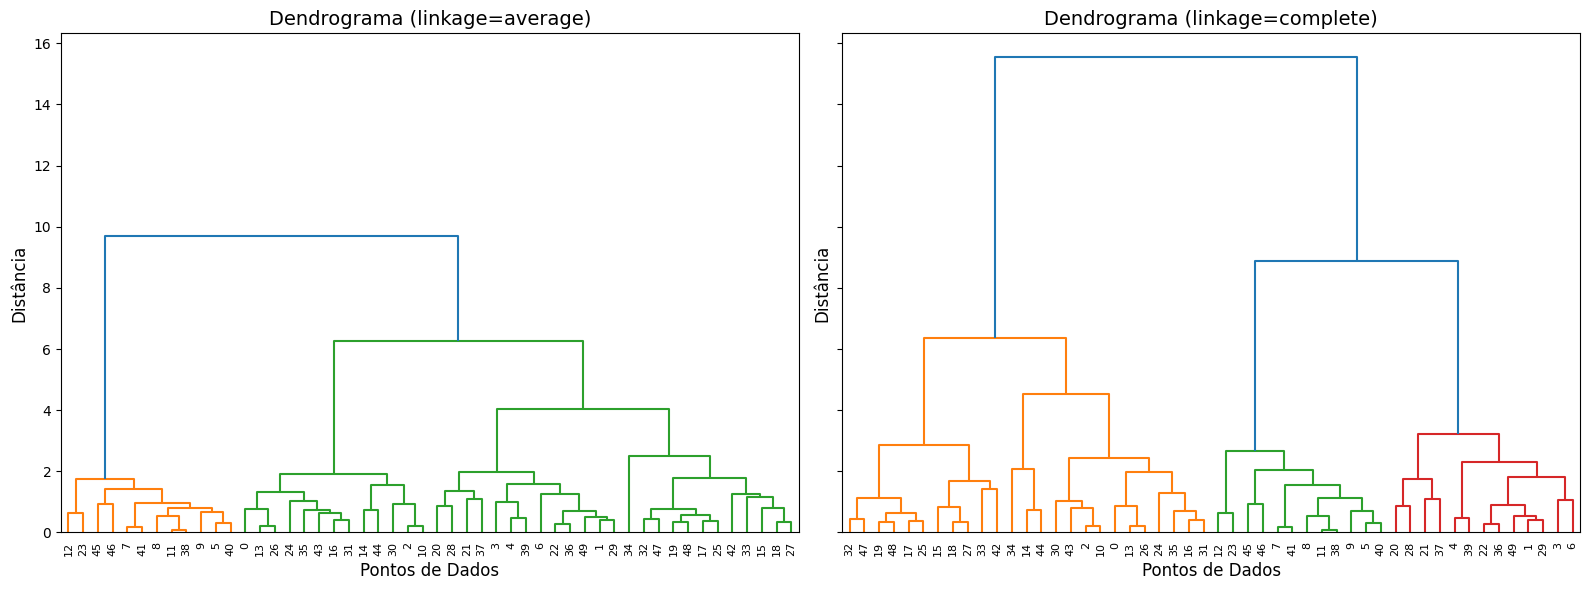

In [ ]:
# Configurando os métodos de ligação
linkage_methods = ['average', 'complete']

# Criando uma figura com subplots lado a lado
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

for ax, method in zip(axes, linkage_methods):
    # Calculando a matriz de ligação
    Z = hierarchy.linkage(X1, method)

    # Gerando o dendrograma
    hierarchy.dendrogram(Z, ax=ax, color_threshold=7)

    # Configurando os títulos e rótulos dos eixos
    ax.set_title(f'Dendrograma (linkage={method})', fontsize=14)
    ax.set_xlabel('Pontos de Dados', fontsize=12)
    ax.set_ylabel('Distância', fontsize=12)

# Ajustando o espaçamento entre os subplots
plt.tight_layout()
plt.show()

### **Comparando os dendrogramas**

---

A análise dos dendrogramas permite entender a estrutura hierárquica dos clusters, identificar o número ideal de clusters e obter insights sobre a similaridade entre os pontos de dados.

* **Altura do ramo**: indica a distância entre os clusters que foram mesclados. Ramos mais longos sugerem maior dissimilaridade entre os clusters.

* **Ordem de mesclagem**: a ordem em que os clusters são mesclados é representada pela sequência dos ramos no dendrograma.

Ao comparar os dois dendrogramas, podemos observar que o critério de ligação `complete` gerou clusters mais distintos em alguns casos, com maior separação entre os grupos. Por outro lado, o método `average` tende a produzir uma estrutura de cluster mais "suave", com transições mais graduais entre os grupos.

A escolha do método de ligação influencia diretamente na formação dos clusters e deve ser considerada de acordo com o objetivo da análise.

### **Visualização dos dendrogramas para cada critério**


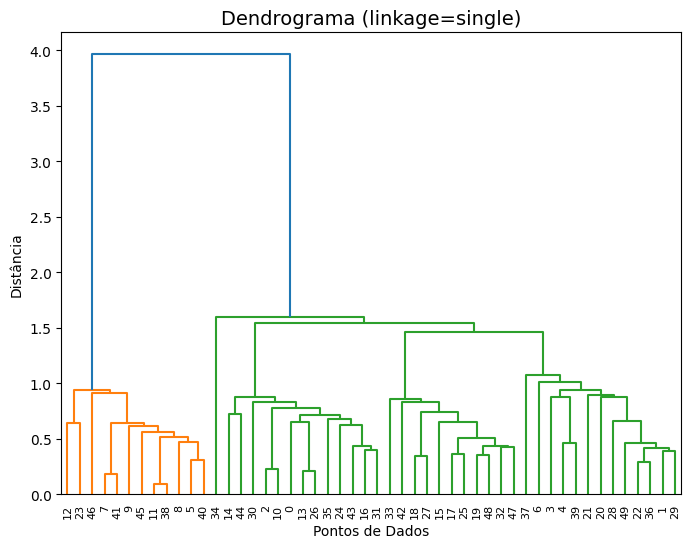

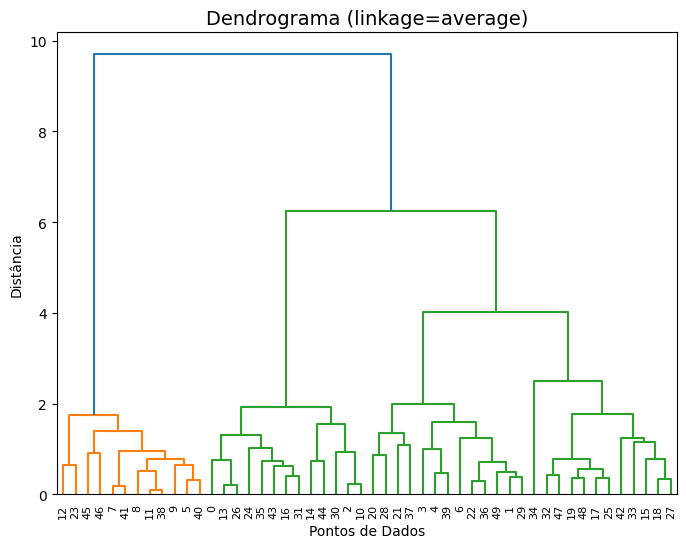

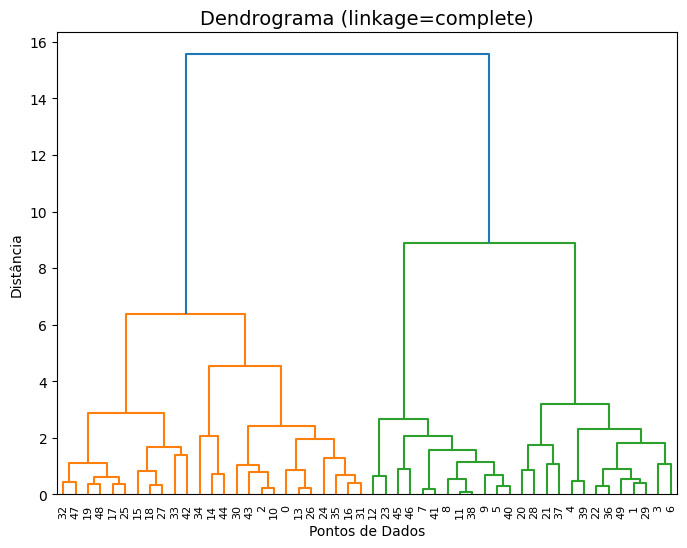

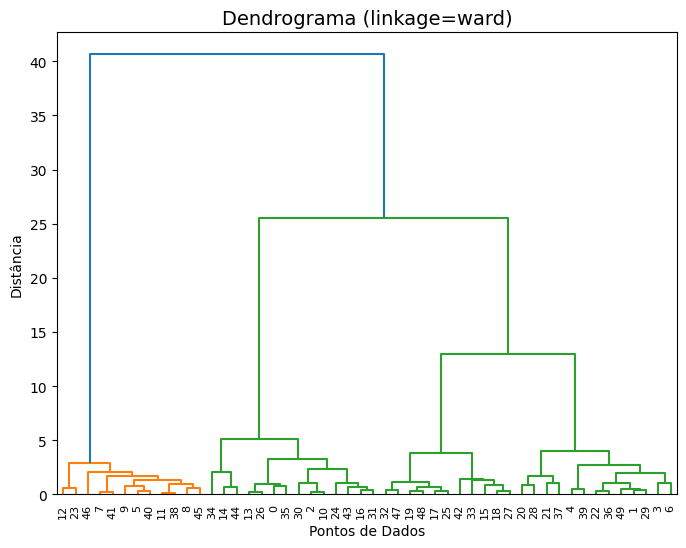

In [ ]:
import os

linkage_methods = ['single', 'average', 'complete', 'ward']

# Cria um diretório para salvar as imagens, se ele não existir
if not os.path.exists('dendrogramas'):
    os.makedirs('dendrogramas')

for method in linkage_methods:
    Z = hierarchy.linkage(X1, method)
    plt.figure(figsize=(8, 6))
    hierarchy.dendrogram(Z)
    plt.title(f'Dendrograma (linkage={method})', fontsize=14)
    plt.xlabel('Pontos de Dados')
    plt.ylabel('Distância')

    # Salva a figura no diretório 'dendrogramas'
    plt.savefig(f'dendrogramas/dendrograma_{method}.png')

    plt.show()

## **Referãncias**

  ROKACH, Lior. Hierarchical Clustering.  Department of Computer Science, Ben-Gurion University of the Negev. Beer-Sheva, Israel, 2022. Disponível em: https://www.cs.princeton.edu/courses/archive/fall18/cos324/files/hierarchical-clustering.pdf. Acesso em: 4 jan. 2025.
  
  SCIKIT-LEARN. AgglomerativeClustering — scikit-learn 1.6.0 documentation. Documentação oficial do Scikit-Learn sobre a classe AgglomerativeClustering, detalhando parâmetros, atributos e exemplos de uso. Disponível em: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html. Acesso em: 8 jan. 2025.

